# 作業重點:

(1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

(2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

# 作業目標:
    
    取得各種優化器的運算結果

In [1]:
from __future__ import print_function
import keras, os
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import optimizers

Using TensorFlow backend.


In [2]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
batch_size = 40
num_classes = 10
epochs = 16
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
model = Sequential()

#   第二步：構建網絡層
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1250858


In [7]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [8]:
#第三步編譯
opt = optimizers.SGD()
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
# 資料正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
# 是否要做資料處理
if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
else:
    print('Using real-time data augmentation.')
        
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Using real-time data augmentation.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/16




50000/50000 [==============================] - 1211s 24ms/step - loss: 2.0858 - acc: 0.2291 - val_loss: 1.9085 - val_acc: 0.3318
Epoch 2/16
50000/50000 [==============================] - 1123s 22ms/step - loss: 1.8023 - acc: 0.3474 - val_loss: 1.7351 - val_acc: 0.3759
Epoch 3/16
50000/50000 [==============================] - 585s 12ms/step - loss: 1.6481 - acc: 0.3991 - val_loss: 1.5519 - val_acc: 0.4383
Epoch 4/16
50000/50000 [==============================] - 609s 12ms/step - loss: 1.5295 - acc: 0.4434 - val_loss: 1.3920 - val_acc: 0.4959
Epoch 5/16
50000/50000 [==============================] - 594s 12ms/step - loss: 1.4223 - acc: 0.4858 - val_loss: 1.3428 - val_acc: 0.5132
Epoch 6/16
50000/50000 [==============================] - 661s 13ms/step - loss: 1.3521 - acc: 0.5135 - val_loss: 1.23

In [11]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\oldmon\Downloads\saved_models\keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 20s 2ms/step
Test loss: 0.9004615223884582
Test accuracy: 0.6836


In [12]:
#    第六步：輸出
import numpy 

print ( " test set " )
scores = model.evaluate(x_test,y_test,batch_size=200,verbose=0)
print ( " The test loss is %f ", scores)

result = model.predict(x_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1)
test_max = numpy.argmax(y_test, axis = 1)

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)

 test set 
 The test loss is %f  [0.9004615390300751, 0.6835999977588654]


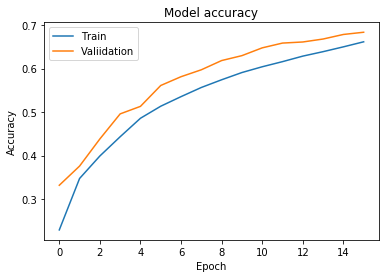

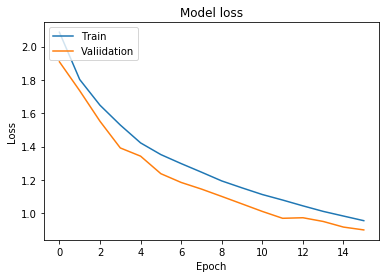

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

In [14]:
model_name='keras_cifar10_trained_model_adam.h5'
opt = optimizers.Adam()
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_adam=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/16
50000/50000 [==============================] - 610s 12ms/step - loss: 1.0444 - acc: 0.6311 - val_loss: 0.8627 - val_acc: 0.6994
Epoch 2/16
50000/50000 [==============================] - 336s 7ms/step - loss: 0.8884 - acc: 0.6890 - val_loss: 0.7986 - val_acc: 0.7232
Epoch 3/16
50000/50000 [==============================] - 332s 7ms/step - loss: 0.7938 - acc: 0.7229 - val_loss: 0.7492 - val_acc: 0.7422
Epoch 4/16
50000/50000 [==============================] - 329s 7ms/step - loss: 0.7272 - acc: 0.7456 - val_loss: 0.7073 - val_acc: 0.7550
Epoch 5/16
50000/50000 [==============================] - 320s 6ms/step - loss: 0.6754 - acc: 0.7632 - val_loss: 0.6835 - val_acc: 0.7663
Epoch 6/16
50000/50000 [==============================] - 322s 6ms/step - loss: 0.6306 - acc: 0.7763 - val_loss: 0.6553 - val_acc: 0.7766
Epoch 7/16
50000/50000 [==============================] - 327s 7ms/step - loss: 0.5925 - acc: 0.7921 - val_loss: 0.6421 -

In [15]:
model_name='keras_cifar10_trained_model_RMSprop.h5'
opt = optimizers.RMSprop()
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_rmsprop=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/16
50000/50000 [==============================] - 318s 6ms/step - loss: 0.4378 - acc: 0.8517 - val_loss: 0.7096 - val_acc: 0.7950
Epoch 2/16
50000/50000 [==============================] - 320s 6ms/step - loss: 0.4660 - acc: 0.8424 - val_loss: 0.7389 - val_acc: 0.7797
Epoch 3/16
50000/50000 [==============================] - 318s 6ms/step - loss: 0.5029 - acc: 0.8332 - val_loss: 0.6616 - val_acc: 0.7911
Epoch 4/16
50000/50000 [==============================] - 335s 7ms/step - loss: 0.5835 - acc: 0.8113 - val_loss: 0.7353 - val_acc: 0.7679
Epoch 5/16
50000/50000 [==============================] - 322s 6ms/step - loss: 0.6756 - acc: 0.7864 - val_loss: 0.7350 - val_acc: 0.7789
Epoch 6/16
50000/50000 [==============================] - 323s 6ms/step - loss: 0.7415 - acc: 0.7689 - val_loss: 0.8031 - val_acc: 0.7668
Epoch 7/16
50000/50000 [==============================] - 322s 6ms/step - loss: 0.8095 - acc: 0.7511 - val_loss: 0.7953 - 

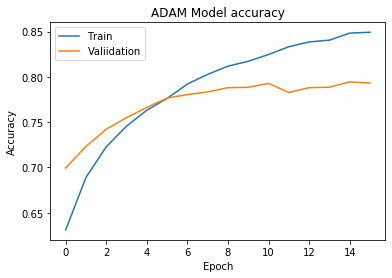

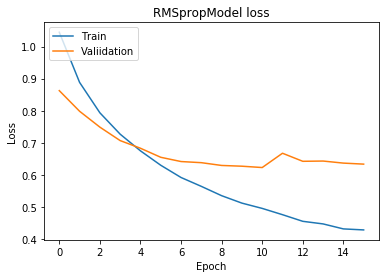

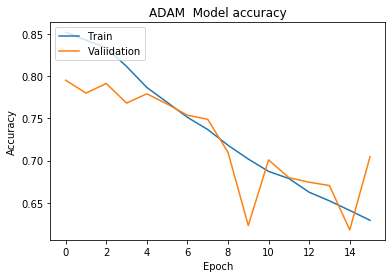

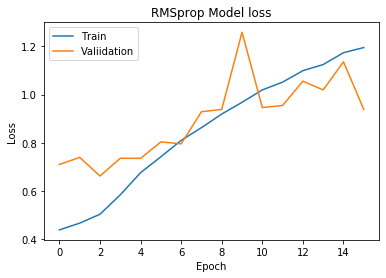

In [16]:
# Plot training & validation accuracy values
plt.plot(history_adam.history['acc'])
plt.plot(history_adam.history['val_acc'])
plt.title('ADAM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('RMSpropModel loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history_rmsprop.history['acc'])
plt.plot(history_rmsprop.history['val_acc'])
plt.title('ADAM  Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_rmsprop.history['loss'])
plt.plot(history_rmsprop.history['val_loss'])
plt.title('RMSprop Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()